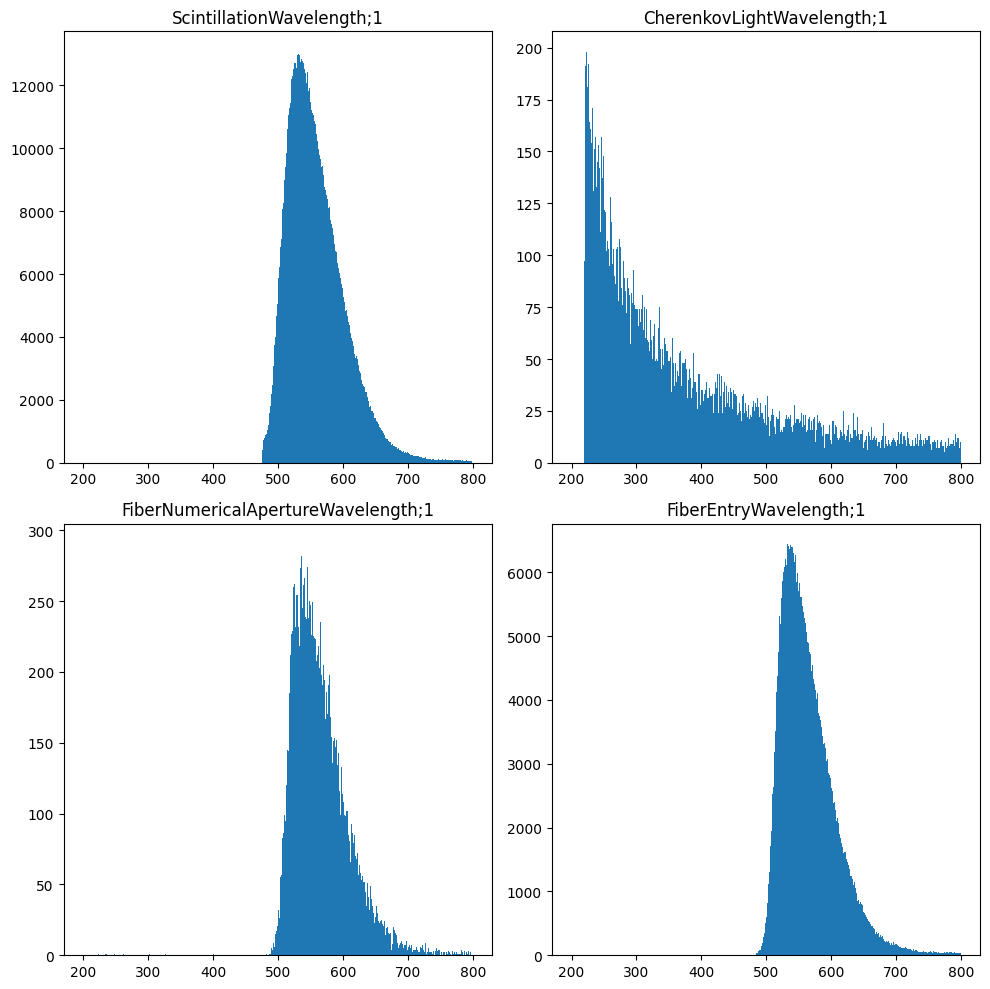

In [30]:
import uproot
import matplotlib.pyplot as plt

# 打开ROOT文件
file = uproot.open("../build/LYsimulations.root")

# 获取H1和H2直方图
h1_keys = ['ScintillationWavelength;1', 'CherenkovLightWavelength;1', 'FiberNumericalApertureWavelength;1', 'FiberEntryWavelength;1']

# 获取H1直方图数据并绘图
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, key in enumerate(h1_keys):
    h1 = file[key]
    h1_data = h1.to_numpy()
    ax = axs[i // 2, i % 2]
    ax.bar(h1_data[1][:-1], h1_data[0], width=h1_data[1][1] - h1_data[1][0])
    ax.set_title(key)

plt.tight_layout()
plt.show()


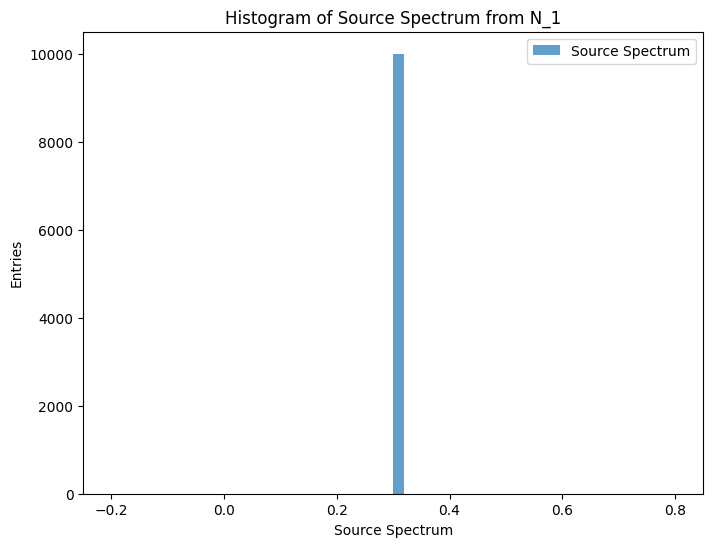

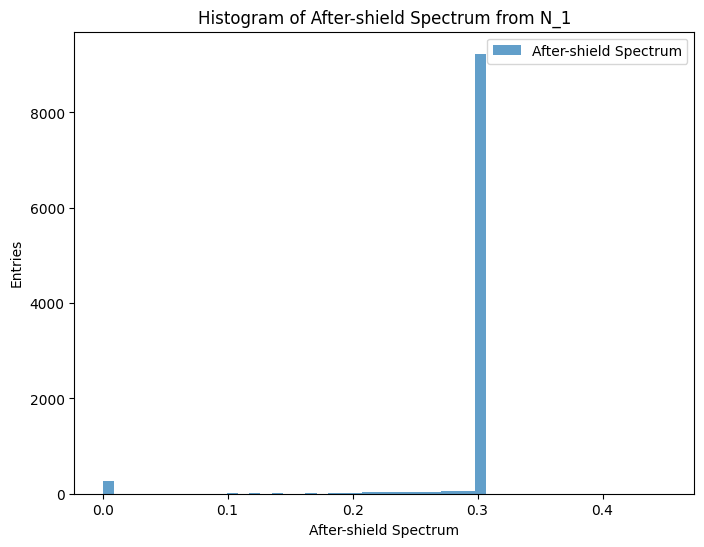

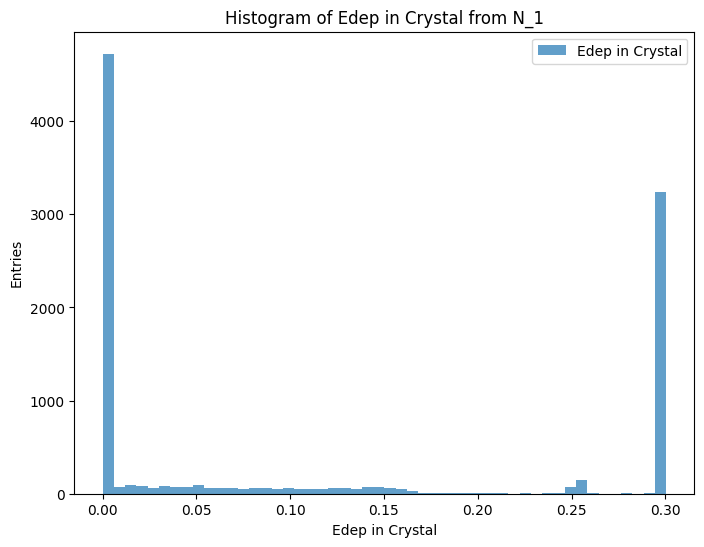

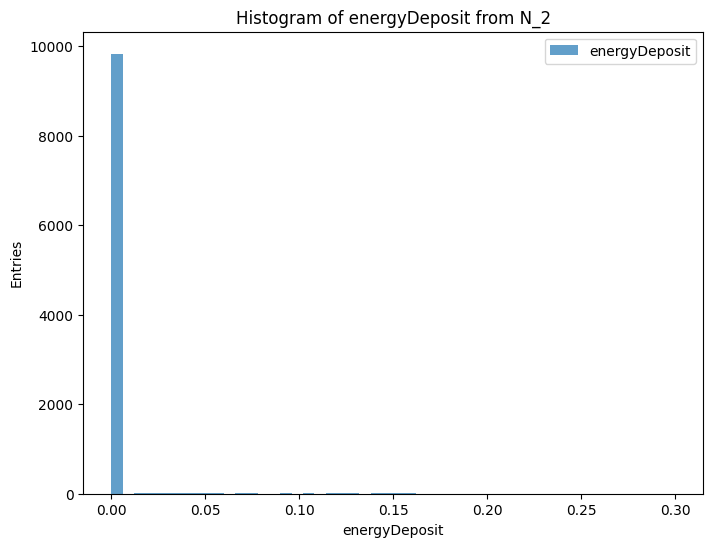

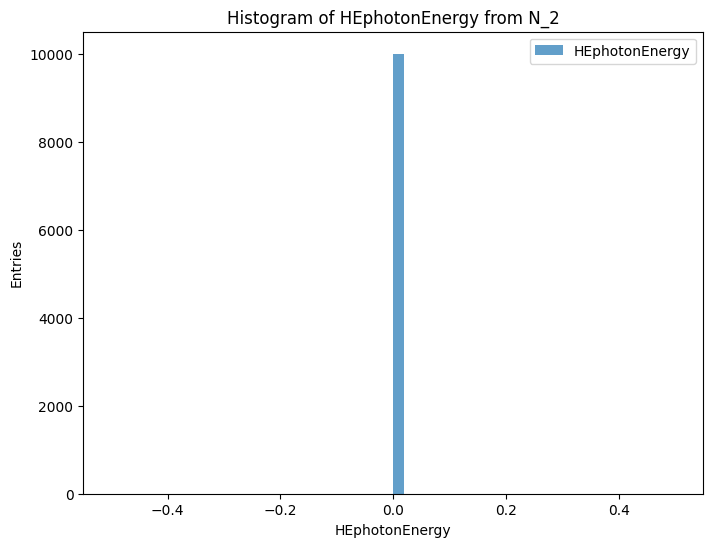

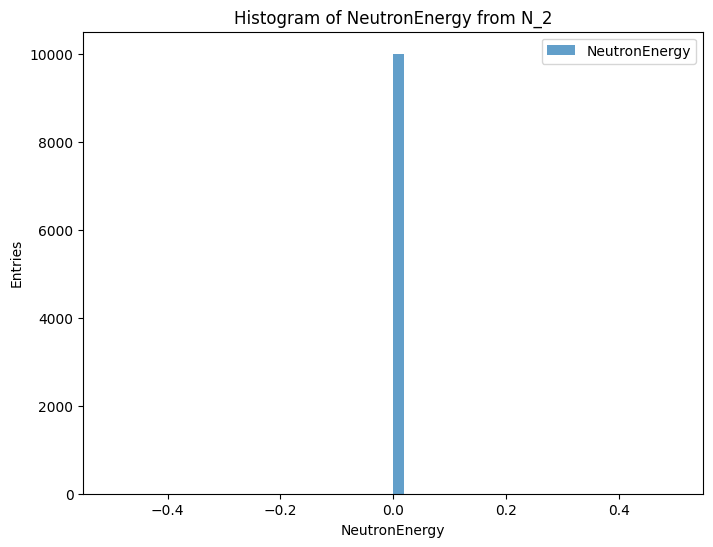

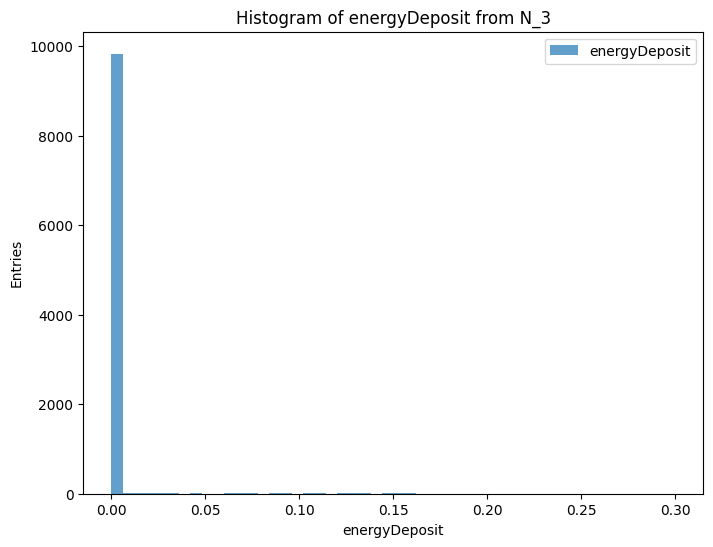

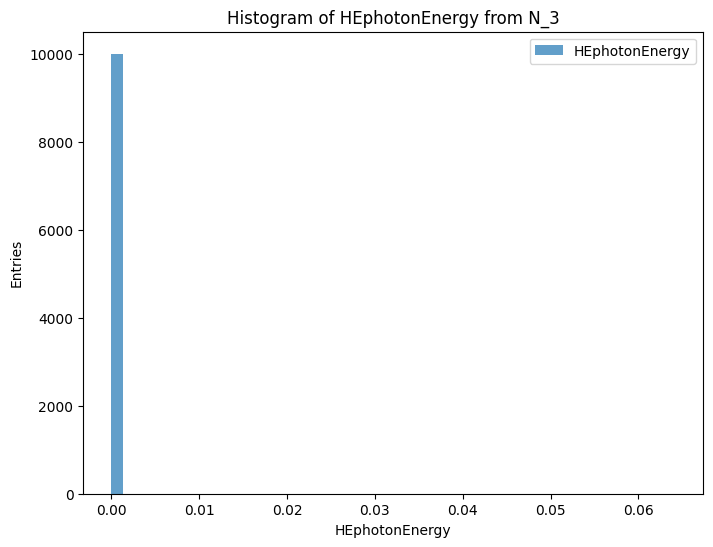

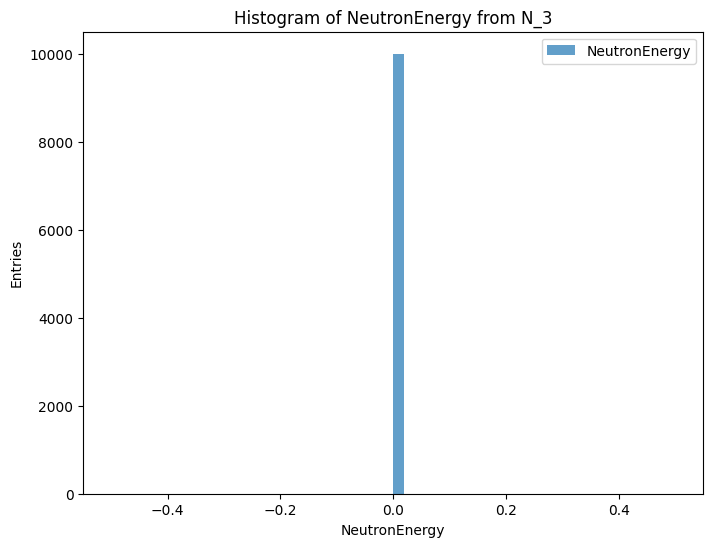

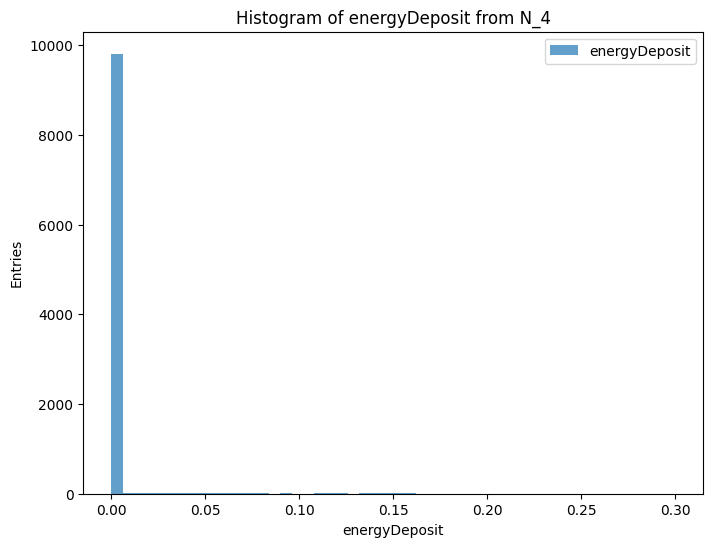

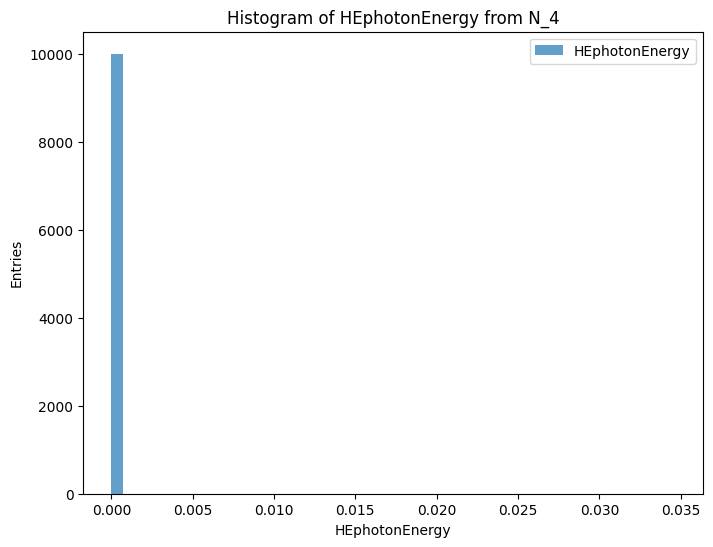

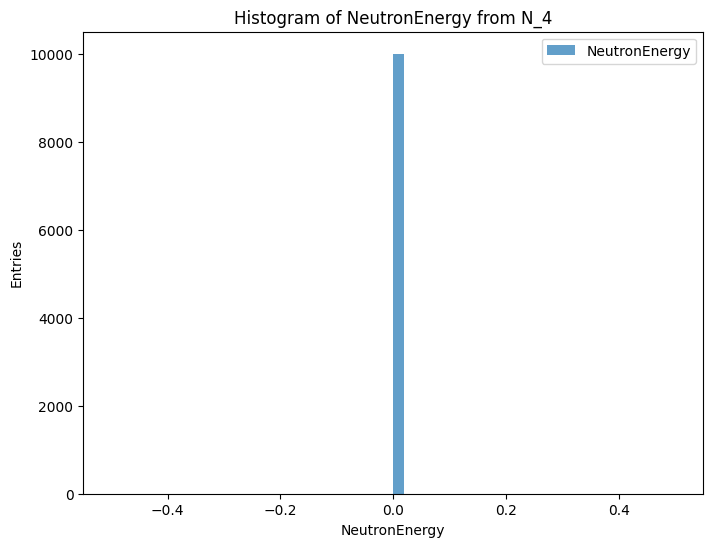

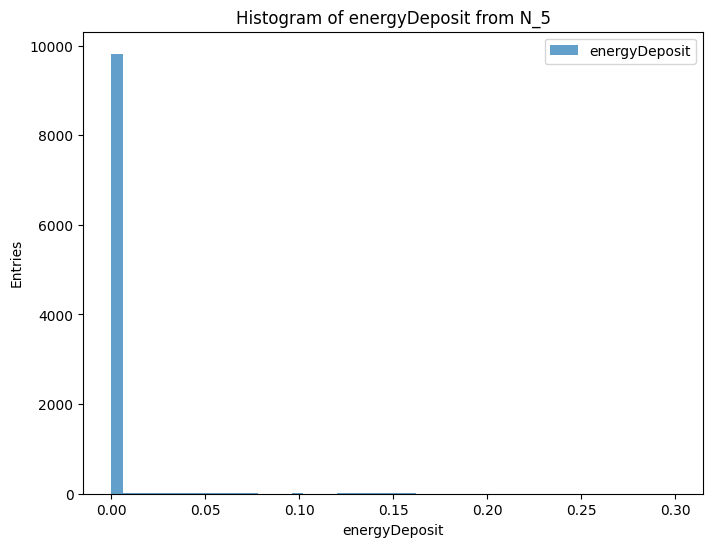

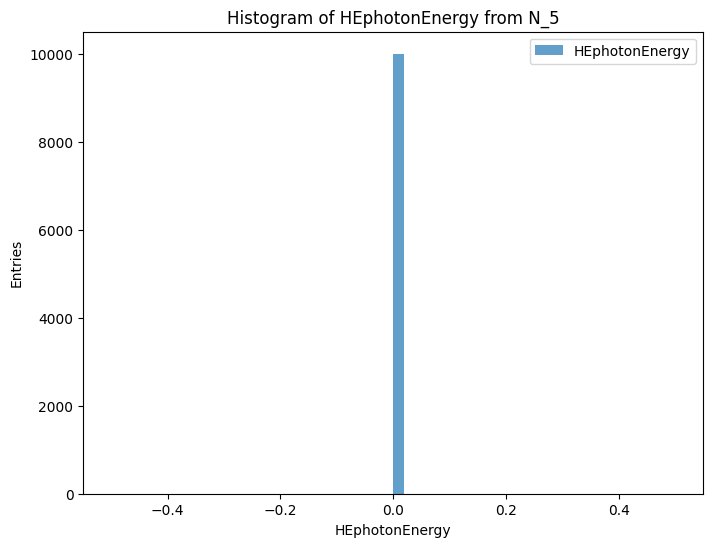

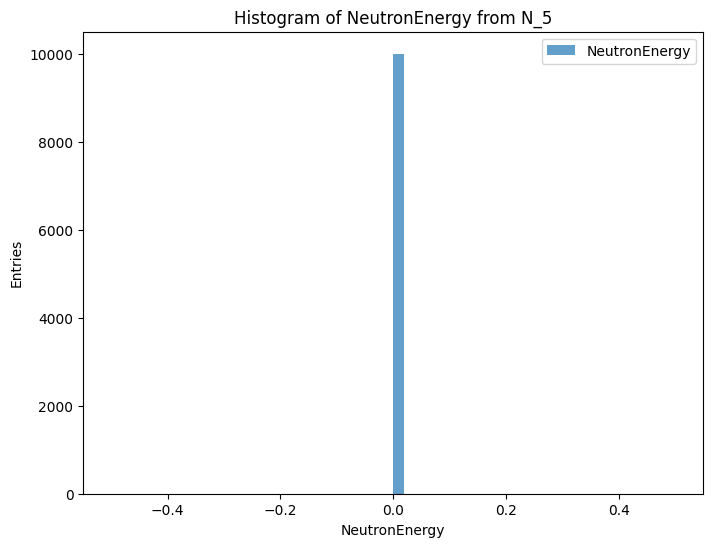

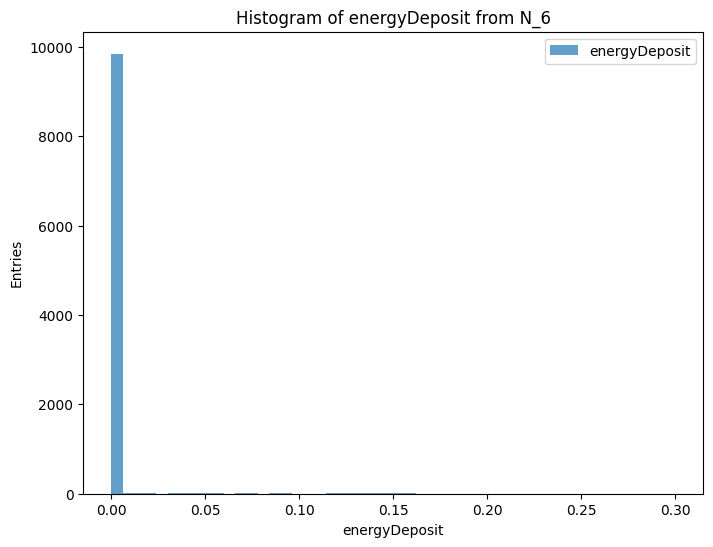

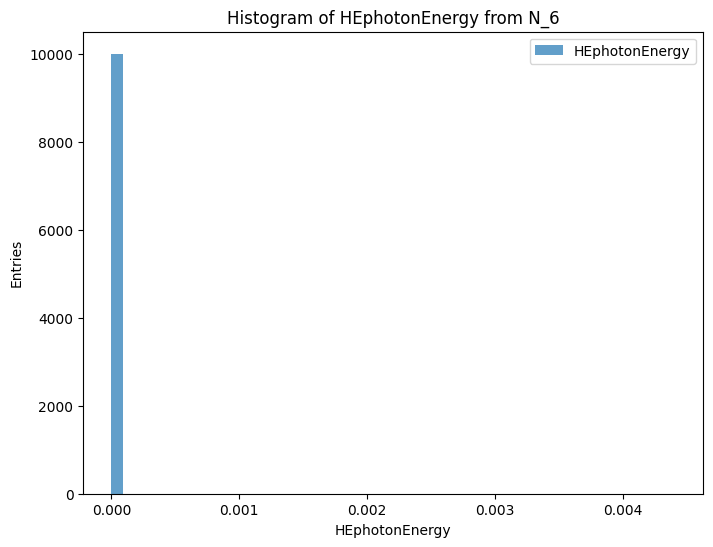

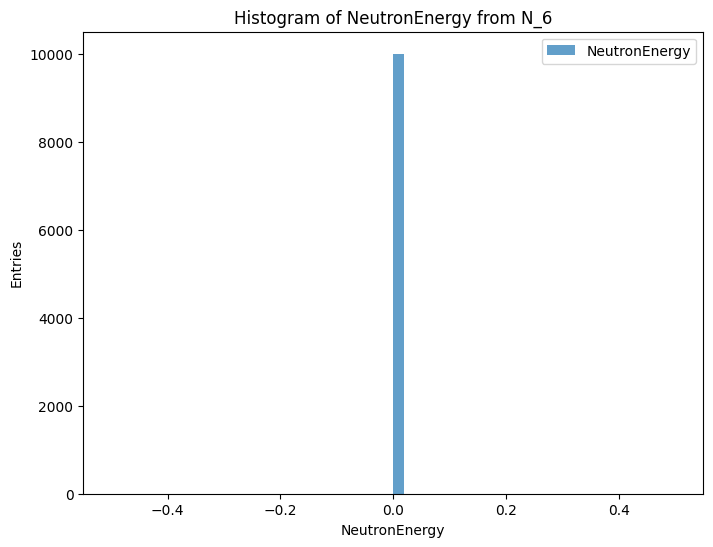

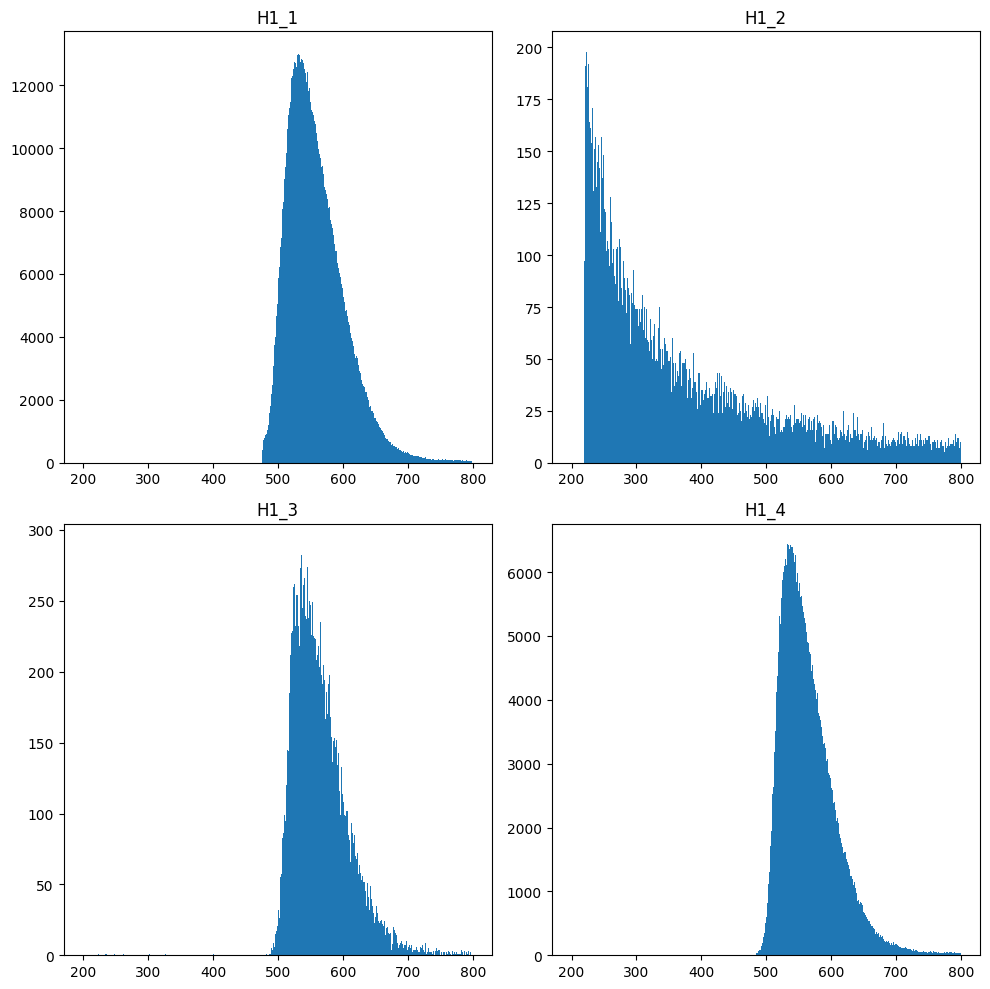

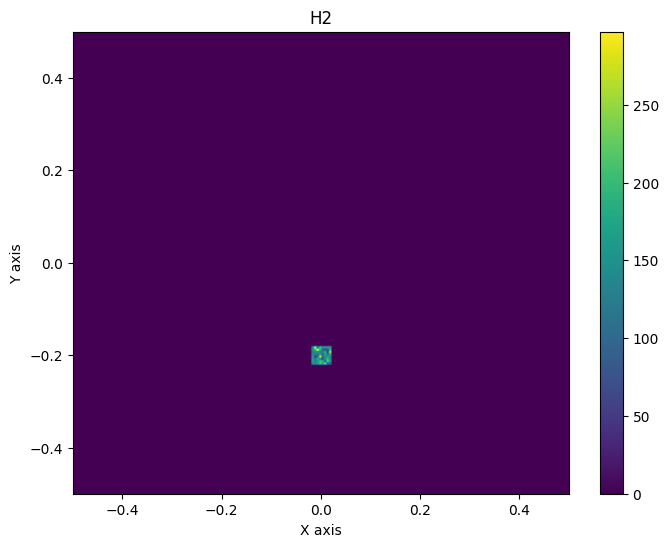

In [34]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

class RootData:
    def __init__(self, file_path):
        self.file = uproot.open(file_path)
        self._load_data()

    def _load_data(self):
        self.Ntuples = {}
        self.H1 = {}
        self.H2 = {}

        # 前面若干是Ntuple，后面4个是H1，最后一个是H2
        keys = self.file.keys()
        ntuple_keys = keys[:-5]
        h1_keys = keys[-5:-1]
        h2_key = keys[-1]

        # 加载Ntuple数据
        for i, key in enumerate(ntuple_keys, start=1):
            ntuple = self.file[key]
            df = ntuple.arrays(library="pd")
            self.Ntuples[f'N_{i}'] = df


        # 加载H1数据
        for i, key in enumerate(h1_keys, start=1):
            h1 = self.file[key]
            h1_data = h1.to_numpy()
            h1_values = h1_data[0]
            h1_edges = h1_data[1]
            self.H1[f'H1_{i}'] = (h1_values, h1_edges)


        # 加载H2数据
        h2 = self.file[h2_key]
        h2_values = h2.values()
        h2_edges = np.histogram2d(h2_values[:, 0], h2_values[:, 1])[1:]  # 使用 numpy.histogram2d 获取边界
        self.H2['H2'] = (h2_values, h2_edges)

    def plot_ntuple(self):
        for ntuple_name, df in self.Ntuples.items():
            for column in df.columns:
                plt.figure(figsize=(8, 6))
                plt.hist(df[column], bins=50, alpha=0.7, label=column)
                plt.xlabel(column)
                plt.ylabel("Entries")
                plt.title(f"Histogram of {column} from {ntuple_name}")
                plt.legend()
                plt.show()

    def plot_h1(self):
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        for i, (h1_name, (values, edges)) in enumerate(self.H1.items()):
            ax = axs[i // 2, i % 2]
            ax.bar(edges[:-1], values, width=edges[1] - edges[0])
            ax.set_title(h1_name)
        plt.tight_layout()
        plt.show()

    def plot_h2(self):
        values, edges = self.H2['H2']
        plt.figure(figsize=(8, 6))
        plt.imshow(values, extent=[edges[0][0], edges[0][-1], edges[1][0], edges[1][-1]], aspect='auto', origin='lower')
        plt.colorbar()
        plt.title('H2')
        plt.xlabel("X axis")
        plt.ylabel("Y axis")
        plt.show()

# 使用示例
root_data = RootData("../build/LYsimulations.root")

# 绘制Ntuple数据
root_data.plot_ntuple()

# 绘制H1数据
root_data.plot_h1()

# 绘制H2数据
root_data.plot_h2()